In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Text(0.5, 1.0, 'Binary_image')

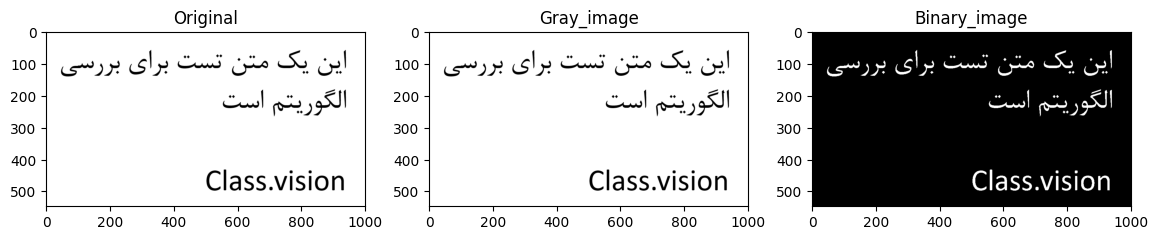

In [3]:
input_image = cv.imread(r"D:\Opencv\class.vision-master\images\matn.png")
gray_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

_, binary_image = cv.threshold(gray_image, 127, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize=[14,8])
plt.subplot(131);plt.imshow(input_image, cmap='gray');plt.title("Original")
plt.subplot(132);plt.imshow(gray_image, cmap='gray');plt.title("Gray_image")
plt.subplot(133);plt.imshow(binary_image, cmap='gray');plt.title("Binary_image")

Text(0.5, 1.0, 'with contours')

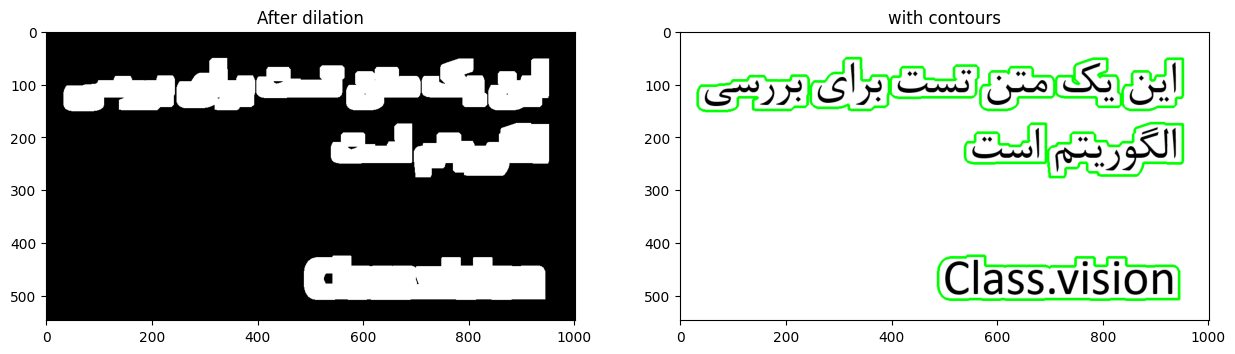

In [4]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (15,10))
dilation = cv.dilate(binary_image, kernel, iterations = 2)
outputImage = input_image.copy()

contours, hierchery = cv.findContours(dilation, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

all_contours = cv.drawContours(input_image, contours, -1, (0,255,0), 3)

plt.figure(figsize=[15,8])
plt.subplot(121);plt.imshow(dilation, cmap='gray');plt.title("After dilation")
plt.subplot(122);plt.imshow(all_contours, cmap='gray');plt.title("with contours")

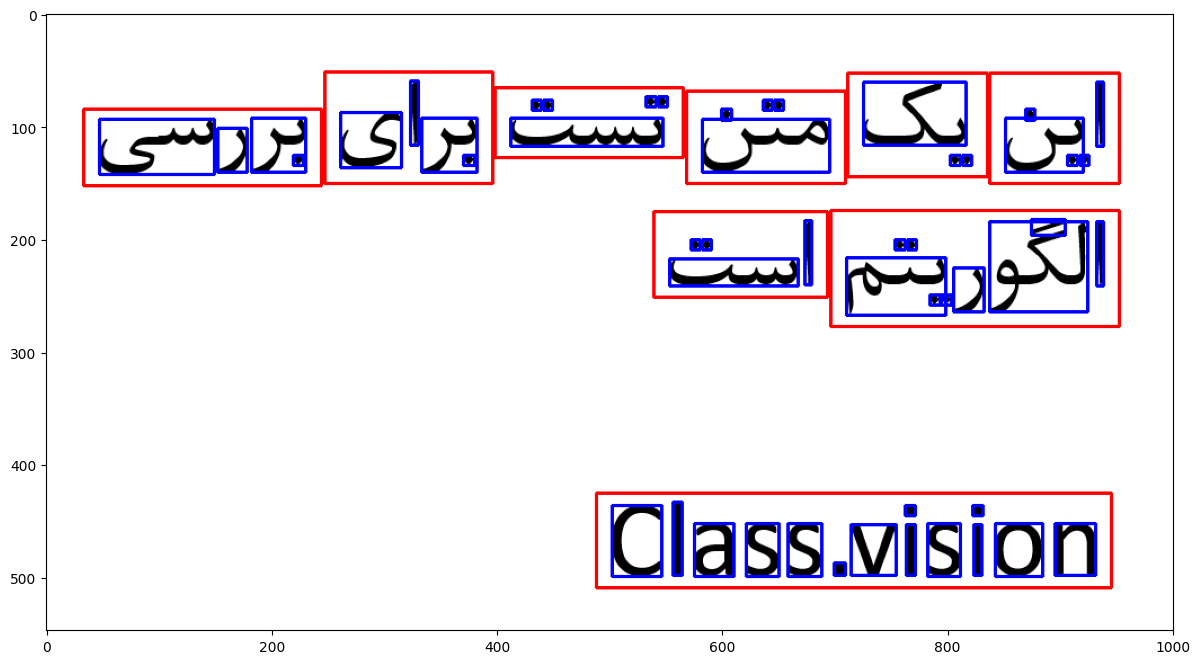

In [6]:
MIN_CONTOUR_AREA = 5

for contour in contours:
    if cv.contourArea(contour) > MIN_CONTOUR_AREA:
        [intX, intY, intW, intH] = cv.boundingRect(contour)
        
        cv.rectangle(outputImage, (intX,intY), (intX+intW,intY+intH), (0,0,255), 2)
        imgROI = binary_image[intY:intY+intH, intX:intX+intW]
        
        subContours, subHierchery = cv.findContours(imgROI.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        
        for subContour in subContours:
            [pointX, pointY, width, height] = cv.boundingRect(subContour)
            cv.rectangle(outputImage, (intX+pointX, intY+pointY), (intX+pointX+width,intY+pointY+height), (255,0,0), 2)
            
plt.figure(figsize=[15,8])
plt.imshow(outputImage[...,::-1])